In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [2]:
data = pd.read_csv('C:\\Users\\14437\\Downloads\\full_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


0    3486
1     246
Name: stroke, dtype: int64


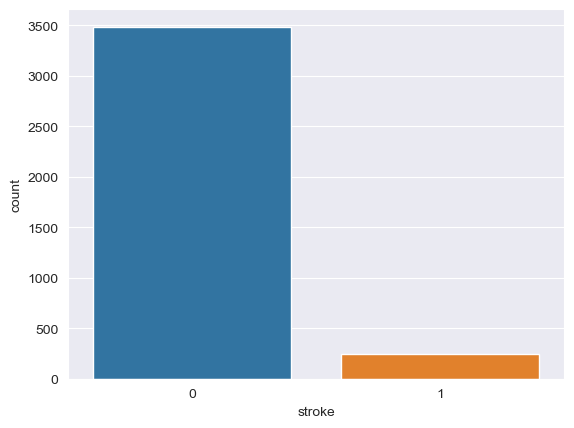

In [3]:
data_clean = data[data['age']>25]
data_clean = data_clean.replace({'gender': {'Female': 0, 'Male': 1}})
data_clean['stroke'].value_counts().to_frame().T
data_clean = data_clean.replace({'ever_married': {'Yes': 1, 'No': 0}})
data2 = pd.get_dummies(data_clean, columns=["work_type", "Residence_type","smoking_status"], prefix=["work", "residence","smoke"])
target = 'stroke'
X = data2.loc[:,data2.columns!=target]
y = data2.loc[:,data2.columns==target]
target = 'stroke'
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [4]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X.shape, y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

1    3486
0    3486
Name: stroke, dtype: int64


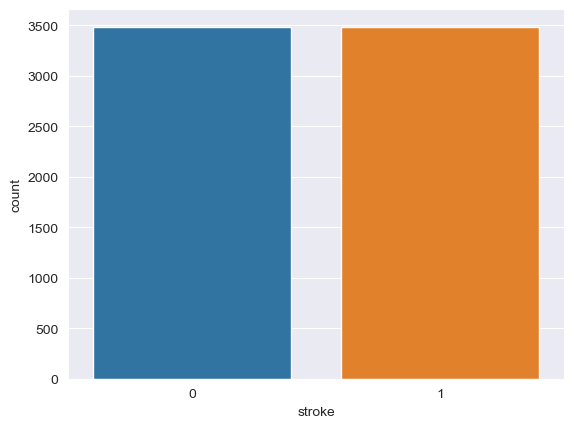

In [5]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [7]:
param_grid = {
    'n_estimators': [1, 10, 20, 50, 100, 150, 200, 250, 300, 400],
    'base_estimator__max_depth': range(2, 11),
    'learning_rate': [.5, .75, 1.0]
}

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring=accuracy_score,
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 270 candidates, totalling 1080 fits


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)

ada_model = AdaBoostClassifier(algorithm='SAMME.R',
    base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=3,
    max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, random_state=None,
    splitter='best'),
    learning_rate=1.0, n_estimators=100, random_state=None)
ada_model=ada_model.fit(X_train,y_train)

In [8]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ada_model, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [9]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(ada_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
test_mean = np.std(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

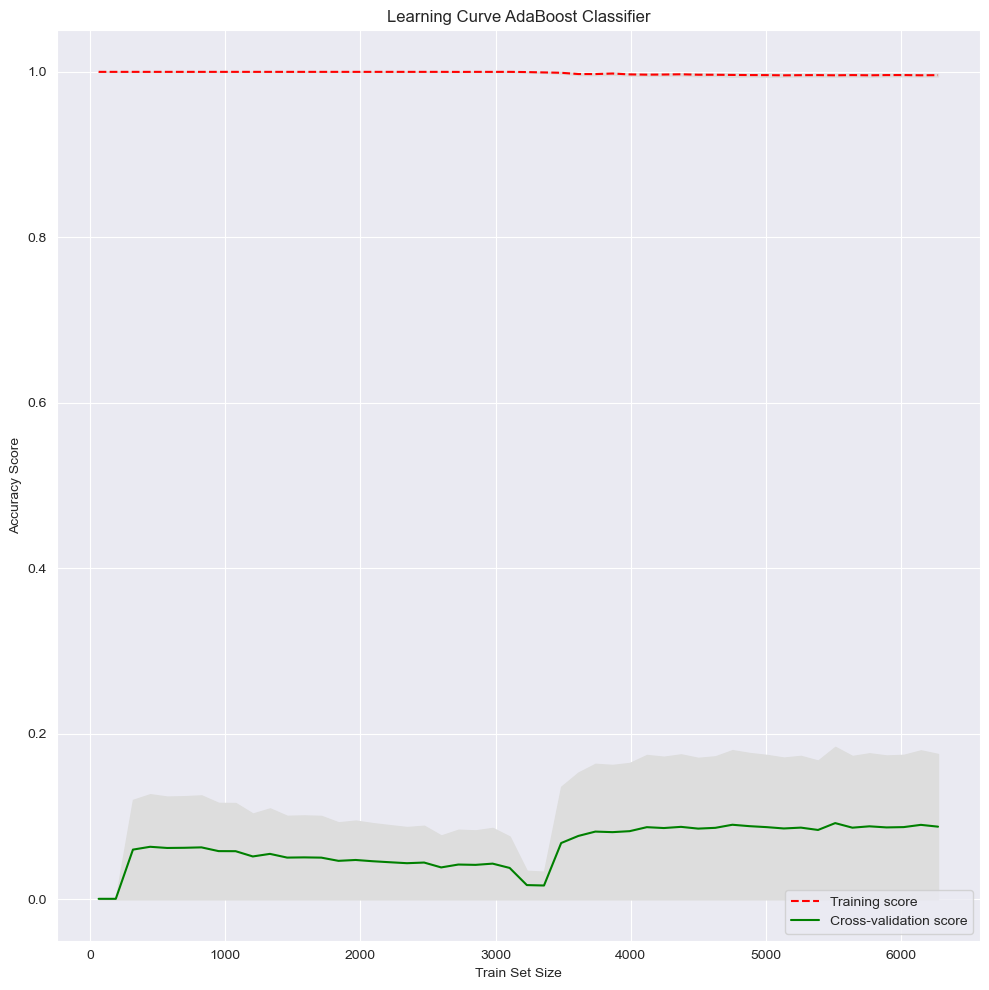

In [10]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="green", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve AdaBoost Classifier")
plt.xlabel("Train Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
ab_clf = AdaBoostClassifier()
parameters = {
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]
}
clf = GridSearchCV(ab_clf, parameters, cv=5)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04]})

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(ab_clf, X, y,
                                       param_name = "learning_rate",
                                       param_range = parameters['learning_rate'],
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

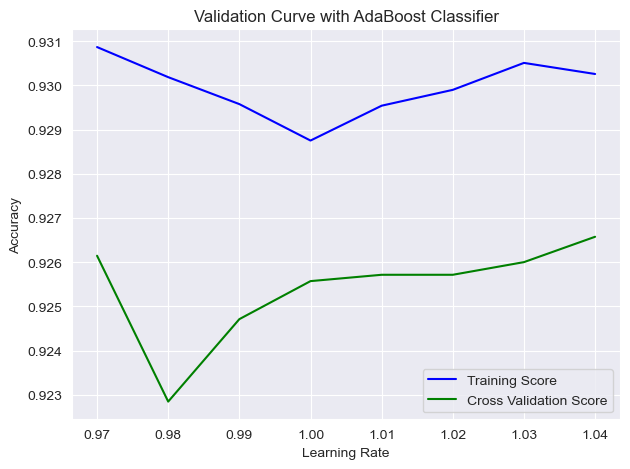

In [13]:
#Plot mean accuracy scores for training and testing scores
plt.plot(parameters['learning_rate'], mean_train_score,
label = "Training Score", color = 'b')
plt.plot(parameters['learning_rate'], mean_test_score,
label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with AdaBoost Classifier")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [20]:
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30, 100, 200, 25, 500]
}
clf = GridSearchCV(ab_clf, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30, 100, 200, 25, 500]})

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(ab_clf, X, y,
                                       param_name = "n_estimators",
                                       param_range = parameters['n_estimators'],
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

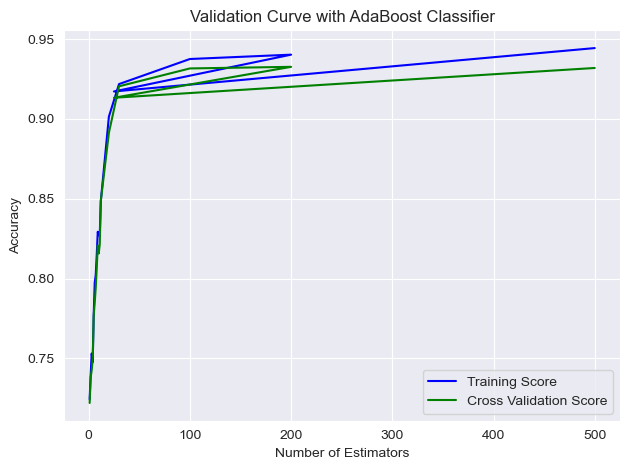

In [22]:
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameters['n_estimators'], mean_train_score,
label = "Training Score", color = 'b')
plt.plot(parameters['n_estimators'], mean_test_score,
label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with AdaBoost Classifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()